# Test Notebook

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


### Data Loading

In [3]:
chestdata = np.load('chestmnist.npz')

X_test = chestdata['test_images']
t_test = chestdata['test_labels']

#normalziation of data
X_test = X_test.astype('float32') / 255.0

#expanding dimensions into 4 channels
X_test = np.expand_dims(X_test, axis=-1)

print(f"Test Data Shape: {X_test.shape}")
print(f"Test Labels Shape: {t_test.shape}")

class_names = np.array([
    'Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration',
    'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax', 
    'Consolidation', 'Edema', 'Emphysema', 'Fibrosis', 
    'Pleural Thickening', 'Hernia'
])

Test Data Shape: (22433, 28, 28, 1)
Test Labels Shape: (22433, 14)


Loading the model:

In [4]:
model_dataset1 = keras.models.load_model('model_dataset1.keras')

### Test Set Performance Evaluation

In [5]:
print("\nEvaluating on Test Set...")
results = model_dataset1.evaluate(X_test, t_test, verbose=1)

print("\n--- Test Set Results ---")
print(f"Loss: {results[0]:.4f}")
print(f"Binary Accuracy: {results[1]:.4f}")
print(f"AUC: {results[2]:.4f}")


Evaluating on Test Set...
702/702 ━━━━━━━━━━━━━━━━━━━━ 2s 990us/step - auc: 0.7299 - binary_accuracy: 0.9477 - loss: 0.1671

--- Test Set Results ---
Loss: 0.1667
Binary Accuracy: 0.9477
AUC: 0.7353


### Confusion Matrices

702/702 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step


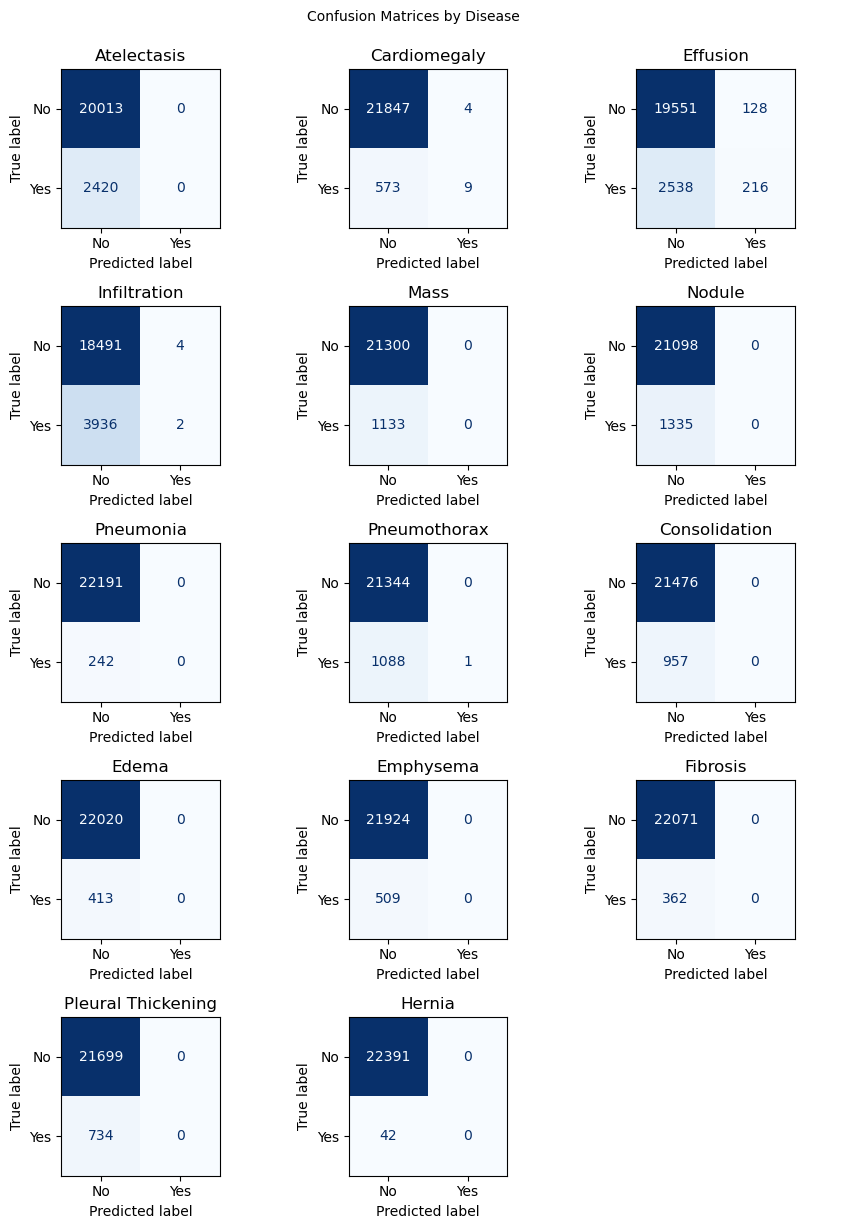

In [9]:
predictions_prob = model_dataset1.predict(X_test)

predictions_binary = (predictions_prob > 0.5).astype(int)

fig, axes = plt.subplots(5, 3, figsize=(9, 12))
axes = axes.flatten() 

for i, ax in enumerate(axes):
    if i < 14:
        cm = confusion_matrix(t_test[:, i], predictions_binary[:, i])
        
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
        disp.plot(ax=ax, cmap='Blues', values_format='d', colorbar=False)
        
        ax.set_title(f'{class_names[i]}')
        ax.grid(False)
    else:
        ax.axis('off')

plt.tight_layout()
plt.suptitle("Confusion Matrices by Disease", fontsize=10, y=1.02)
plt.show()